# Public Data Visualization

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_excel('United_Way_Synthetic_Dataset.xlsx')

def generate_annual_metric_visualization(strategy_name,program_name=None):
    strategy_frame = data[(data['Strategy_Name']==strategy_name)]

    metric_names = list(set(strategy_frame['Outcome_Indicator_Name']))
    metric_sums = []
    metric_targets =[]
    for metric_name in metric_names:
        metric_sum = 0
        metric_frame = strategy_frame[strategy_frame['Outcome_Indicator_Name']==metric_name]
        for i in range(-8,-1):
            metric_sum += metric_frame[metric_frame.columns[i]].sum()
        metric_sums.append(metric_sum)
        metric_targets.append(metric_frame[metric_frame.columns[-1]].sum())
    
    ind = np.arange(len(metric_names)) 
    width = 0.35       
    plt.bar(ind, metric_sums, width, label='Actual to Date')
    plt.bar(ind + width, metric_targets, width, label='Annual Target')
    
    plt.ylabel('Measure Value')
    plt.xticks(ind + width / 2, metric_names, rotation='vertical')
    plt.legend(loc='best')
    plt.show()

#generate_annual_metric_visualization('Increase Access to Mental Health Programs')

def generate_specific_metric_visualization(metric_name,strategy_name,program_name=None):
    frame = data[(data['Strategy_Name']==strategy_name)&(data['Outcome_Indicator_Name']==metric_name)]
    
    values = []
    cumulative_values = []
    x_axis = []
    target = frame[frame.columns[-1]].sum()
    
    for i in range(-8,-1):
        values.append(frame[frame.columns[i]].sum())
        x_axis.append(frame.columns[i])
        
    cumulative_values.append(values[0])
    for i in range(1,len(values)):
        cumulative_values.append(values[i] + cumulative_values[i-1])
    
    plt.hlines(target,0,len(cumulative_values)-1, 'r', 'dotted')
    plt.ylabel('Measure Value')
    plt.plot(cumulative_values, '-bo')
    plt.xticks(np.arange(len(x_axis)), x_axis, rotation='vertical')
    plt.show()
    
#generate_specific_metric_visualization('Number of Families Receiving Mental Health Outreach Efforts','Increase Access to Mental Health Programs')

TwoByTwoLayout(children=(Select(description='Strategy:', layout=Layout(grid_area='top-left'), options=('Increa…

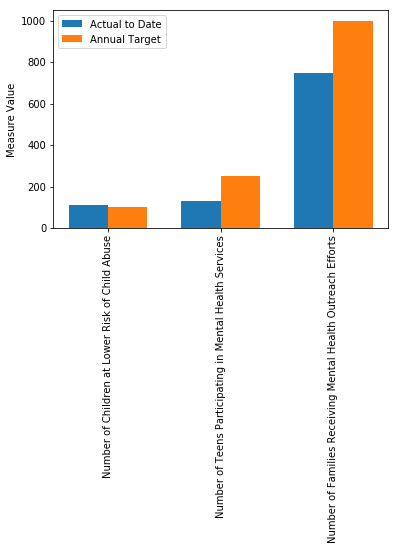

In [17]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import TwoByTwoLayout
from IPython.display import clear_output

strategy_dropdown = widgets.Select(
    options=list(set(data['Strategy_Name'])),
    # rows=10,
    description='Strategy:',
    disabled=False
)
metric_dropdown = widgets.Select(
    options=list(set(data['Outcome_Indicator_Name'])),
    # rows=10,
    description='Metric:',
    disabled=False
)

btn = widgets.Button(description='Generate')
def btn_eventhandler(obj):
    #clear_output()
    generate_annual_metric_visualization(strategy_dropdown.value)
btn.on_click(btn_eventhandler)

#display(strategy_dropdown)
#display(btn)
TwoByTwoLayout(top_left=strategy_dropdown,
               top_right=btn)

Button(description='Generate', style=ButtonStyle())

TwoByTwoLayout(children=(Select(description='Strategy:', layout=Layout(grid_area='top-left'), options=('Increa…

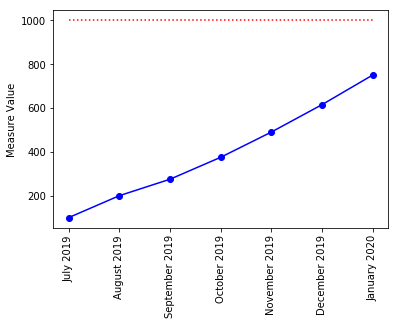

In [18]:
btn = widgets.Button(description='Generate')
def btn_eventhandler(obj):
    generate_specific_metric_visualization(metric_dropdown.value,strategy_dropdown.value)
btn.on_click(btn_eventhandler)

display(btn)

TwoByTwoLayout(top_left=strategy_dropdown,
               top_right=metric_dropdown)



In [10]:
from pmdarima.arima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
from pmdarima.arima import auto_arima

data = pd.read_excel('United_Way_Synthetic_Dataset.xlsx')
strategy_name = "Increase Access to Mental Health Programs"
metric_name = "Number of Children at Lower Risk of Child Abuse"

frame = data[(data['Strategy_Name']==strategy_name)&(data['Outcome_Indicator_Name']==metric_name)]

values = []
cumulative_values = []
x_axis = []
target = frame[frame.columns[-1]].sum()

for i in range(-8,-1):
    values.append(frame[frame.columns[i]].sum())
    x_axis.append(frame.columns[i])
    
cumulative_values.append(values[0])
for i in range(1,len(values)):
    cumulative_values.append(values[i] + cumulative_values[i-1])

plt.hlines(target,0,len(cumulative_values)-1, 'r', 'dotted')
plt.ylabel('Measure Value')
plt.plot(cumulative_values, '-bo')
plt.xticks(np.arange(len(x_axis)), x_axis, rotation='vertical')
plt.show()

model = auto_arima(values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

model.order

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(values, order=(1, 1, 1))
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(12, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc)
lower_series = pd.Series(conf[:, 0])
upper_series = pd.Series(conf[:, 1])

for i in range(len(values)):
    fc[i]=values[i]
    lower_series[i]=values[i]
    upper_series[i]=values[i]

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(values, label='training')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#n_periods = 5
#fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
#index_of_fc = np.arange(len(values), len(values)+n_periods)
#
#fc_series = pd.Series(fc, index=index_of_fc)
#lower_series = pd.Series(confint[:, 0], index=index_of_fc)
#upper_series = pd.Series(confint[:, 1], index=index_of_fc)
#
#plt.plot(values)
#plt.plot(fc_series, color='darkgreen')
#plt.fill_between(lower_series.index, 
#                 lower_series, 
#                 upper_series, 
#                 color='k', alpha=.15)
#plt.show()